<a href="https://colab.research.google.com/github/say3dd/blabla/blob/main/CS3IVP_lab_04_2024_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Aston University <br/><br/> CS3IVP: Image and Video Processing <br/><br/> Lab 04: First ASSESSED lab</center>

Academic year: 2024-2025 <br/>
Module tutors:
 - Debaleena roy <br/> <a href="mailto:d.roy@aston.ac.uk">d.roy@aston.ac.uk</a> <br/>
 - Martin Adams <br/> <a href="mailto:martin.adams1@aston.ac.uk">martin.adams1@aston.ac.uk</a> <br/>





## Instructions
Submission is required for this laboratory. Please fill in your answers and submit the completed notebook (ipynp file) using the link name `First assessed lab submission` within the `Assessment Submission` area of the Blackboard module.

**You have until 10 minutes to the end of the session to complete this assessment (plus 5 minutes extra to submit).** It is your responsibility to ensure that your work is submitted on time. Two marks will be subtracted from your total for every part minute over this deadline that you submit. After submission, please ensure that your work has been uploaded by choosing the `my submissions` option from the top of the assignment submission page and then selecting your file's name next to your submission. If the document that you submitted is displayed, then your assignment has been submitted.

The lab has been designed so that it can be completed in 40 minutes to ensure that you have time to check your submission by the end of the session. There is a total of 20 marks per lab.

You are welcome to browse online documentation if necessary, but you must not collaborate with others in any way.

## Task 4.1

<span style="color:#aa0000; font-family: monospace;">**Define**</span> a Numpy 3x3 matrix with random values.

Print the matrix.

The diagonal from the top left corner to the bottom right corner of a square matrix is called the **main diagonal or leading diagonal.** Use a python for loop to increase the values of the main diagonal of the previously defined matrix by 1.

Print the final matrix


Given your knowledge of **Lab 1** , this task should be straightforward.

<span style="color:#aa0000; font-family: monospace;">**[6 marks]**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the matrices are not printed**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the matrix does not contain random numbers**</span>



In [2]:
import numpy as np


# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)
matrix = np.random.rand(3, 3)
for i in range(len(matrix)):
    matrix[i, i] += 1
print(matrix)


# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)


[[1.9489244  0.90362271 0.7461315 ]
 [0.8141453  1.67647912 0.88214611]
 [0.61603114 0.97854057 1.61104444]]


## Task 4.2a
<span style="color:#aa0000; font-family: monospace;">**Write**</span> a Python function `threshold_transform`:
 - It must take a grey image matrix and a `threshold` as arguments and return an image of the same shape and type.
 - The function must return an image with the values below the `threshold` value sent to black and all above or equal to it sent to white.
 - The images passed as arguments must be arrays, not the paths of the images on the file system.
 - The solution must not contain loops.

Given your knowledge of **Local Image Enhancement** , this task should be straightforward**(see Lecture 02)**.

Remember to return an image of type `np.uint8`, as otherwise the image will be displayed using the default float-to-colour map. To change the type of the arrays you can use the NumPy array method `astype`.

<span style="color:#aa0000; font-family: monospace;">**[5 marks]**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the solution contains loops,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the input images are modified,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-2 marks if the returned value is not `np.uint8`,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-2 marks if argument is a rather than images**</span>

Advice, only in case you are having difficulties:
- In Python, as in Java, parameters are usually references ([except for immutable objects](https://docs.python.org/3/faq/programming.html#how-do-i-write-a-function-with-output-parameters-call-by-reference)). Because of this, you should work on a copies of the images, and avoid modifying any input image (except in very specific cases where that is the desired behaviour). You can create a copy of a given image using the `np.array` constructor. For instance: `tmp = np.array(input_image)`.
- You can write the function and the code in the cell below. If you do not feel too confident writing Python functions, before writing the function, it may be easier for you to write the code inside it with a fixed threshold. Once you have the code working for a specific value, you can make it a function. (As usual, focus on one problem at a time!)

In [3]:
from re import A
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow


# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)
def threshold_transform(grey_image, threshold):
  grey_image[grey_image < threshold] = 0
  grey_image[grey_image >= threshold] = 255
  return grey_image.astype(np.uint8)

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 4.2b
<span style="color:#aa0000; font-family: monospace;">**Apply**</span> your function to `image1.bmp`, from the test images on Blackboard, with a threshold value of $140$. <span style="color:#aa0000; font-family: monospace;">**Display**</span> the input image and the resulting image in the same cell.

<span style="color:#aa0000; font-family: monospace;">**[2 marks]**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if more than one cell is used**</span>

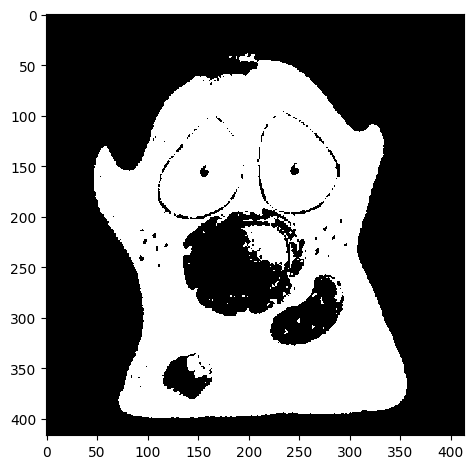

In [10]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)
image_copy = np.array(imread('image1.bmp'))
imshow(image_copy)
image = threshold_transform(image_copy, 140)
imshow(image)
# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 4.3

<span style="color:#aa0000; font-family: monospace;">**Write**</span> a Python function `intensity_slicing`:
 - It must take a grey image matrix and a `threshold` as arguments and return an image of the same shape and type.
 - Within the function, first calculate the median intensity value.
 - Second, calculate the first quantile of the intensity values. (**Tip** - first quantile represents a value below which a quarter (25%) of the data points in a dataset fall. In other words, it divides the dataset into four equal parts, and the first quantile corresponds to the lower boundary of the second quartile. See the API documentation of the numpy function `np.percentile`)
 - The function must return an image with the values between median and first quantile sent to black.
 - The images passed as arguments must be arrays, not the paths of the images on the file system.
 - The solution must not contain loops.
 - **Apply** your function to image2.bmp, from the test images on Blackboard. Display the input image and the resulting image in the same cell.

Given your knowledge of **Local Image Enhancement** , this task should be straightforward**(see Lecture 02 and Lab 03)**.

Remember to return an image of type `np.uint8`, as otherwise the image will be displayed using the default float-to-colour map. To change the type of the arrays you can use the NumPy array method `astype`.

<span style="color:#aa0000; font-family: monospace;">**[7 marks]**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the solution contains loops,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the input images are modified,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-2 marks if the returned value is not `np.uint8`,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-2 marks if argument is a rather than images**</span>


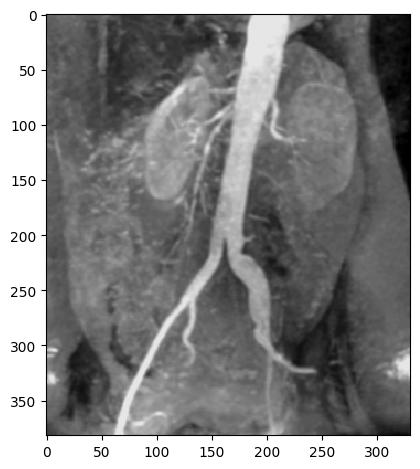

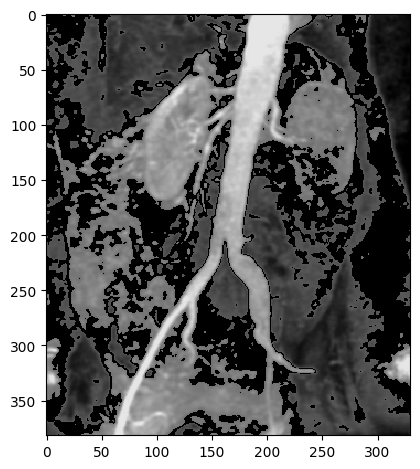

In [12]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

def intensity_slicing(image_matrix, threshold):
  image = np.copy(image_matrix)
  median = np.median(image)
  first_quantile = np.percentile(image, 25)
  # if its between first quantile and median, make them 0
  image_matrix[(image > first_quantile) & (image < median)] = 0

  return image_matrix.astype(np.uint8)


# show non changed image two
image_two = imread('image2.bmp')
imshow(image_two)
plt.figure()

# copy image two, so original isnt changed
image_copy_two = np.array(imread('image2.bmp'))
imshow(image_copy_two)
# apply function
image_copy_two = intensity_slicing(image_copy_two, 140)
imshow(image)
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

## End of lab 04